## CA 2 - Review of Agriculture in Ireland

### Organic food production

Source = Eurostat

In [1]:
# Importing the libraries

# libraries for graphics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# create tables
from tabulate import tabulate

#graphics for calculations
import numpy as np
import pandas as pd


# libraries for analysis
import datetime 
import statistics
from scipy.stats import binom
from scipy.stats import poisson
import pylab
from scipy import stats


### Step 1 - Import and view the dataframe

In [2]:
# Step 1 - import the dataframe

Organic_food_df = pd.read_csv("Datasets/org_aprod_linear.csv")

In [3]:
# view the shape of the dataframe

Organic_food_df.shape

(3935, 9)

In [4]:
# view the first lines of the dataframe

Organic_food_df.head()

,DATAFLOW,LAST UPDATE,freq,agriprod,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BE,2016,5502.0,NaN
1,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BE,2017,7321.0,NaN
2,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BE,2018,8708.0,NaN
3,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BE,2019,9601.0,NaN
4,ESTAT:ORG_APROD(1.0),02/12/22 23:00:00,A,B0010,T,BE,2020,10364.0,NaN


In [5]:
# Show the columns of the dataframe and count of values therein

Organic_food_df.count()

DATAFLOW       3935
LAST UPDATE    3935
freq           3935
agriprod       3935
unit           3935
geo            3935
TIME_PERIOD    3935
OBS_VALUE      3728
OBS_FLAG        367
dtype: int64

In [6]:
# display the 

Organic_food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3935 entries, 0 to 3934
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     3935 non-null   object 
 1   LAST UPDATE  3935 non-null   object 
 2   freq         3935 non-null   object 
 3   agriprod     3935 non-null   object 
 4   unit         3935 non-null   object 
 5   geo          3935 non-null   object 
 6   TIME_PERIOD  3935 non-null   int64  
 7   OBS_VALUE    3728 non-null   float64
 8   OBS_FLAG     367 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 276.8+ KB


#### Exploring the Contents of the Dataframe

In [7]:
# check for duplicate rows of data

duplicate_rows_df = Organic_food_df[Organic_food_df.duplicated()]

print("Number of duplicate rows in the dataframe: ", duplicate_rows_df.shape)

Number of duplicate rows in the dataframe:  (0, 9)


In [8]:
# Check for null values in the dataframe 

print(Organic_food_df.isnull().sum())

DATAFLOW          0
LAST UPDATE       0
freq              0
agriprod          0
unit              0
geo               0
TIME_PERIOD       0
OBS_VALUE       207
OBS_FLAG       3568
dtype: int64


In [9]:
# count the unique values in the each column of the datafram

Organic_food_df.nunique()

DATAFLOW          1
LAST UPDATE       1
freq              1
agriprod         23
unit              2
geo              33
TIME_PERIOD      10
OBS_VALUE      1968
OBS_FLAG          7
dtype: int64

In [10]:
# count unique 'agriprod' values, grouped by geo (country)

Organic_food_df.groupby('agriprod')['geo'].nunique()

agriprod
B0010     30
B1000     30
B3100     30
B4100     29
B4200     28
B5000     26
B7000     30
B7100     10
B8000      8
B9000     26
D1100A    33
D1110A    32
D1120A    27
D1130A    30
D1140A    10
D2100     31
D2200     31
D4100     31
D6100     32
D7100     32
D8000H    33
D9500     25
D9910     24
Name: geo, dtype: int64

In [11]:
# count unique 'agriprod' values, grouped by geo (country)

#Organic_food_df.groupby('geo')['agriprod'].nunique()

In [12]:
#sns.pairplot(Organic_food_df, hue="geo");

In [13]:
#sns.pairplot(Organic_food_df, hue="agriprod");

#### Data Preparation

Actions carried out based on table 1 in accompanying word report.

In [14]:
org_food_df = Organic_food_df.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'OBS_FLAG'], axis=1)

In [15]:
org_food_df.rename(columns = {
    'unit':'Unit',
    'geo':'Country',
    'TIME_PERIOD':'Year',
    'OBS_VALUE':'Value',
    },
      inplace=True)

In [17]:
# replace values

values_to_be_added = {
    'D1100A':'Raw milk', 
    'D1110A':'Raw cows milk', 
    'D1120A':'Ewes milk', 
    'D1130A':'Goats milk', 
    'D1140A':'Buffalos milk', 
    'D2100':'Drinking milk', 
    'D2200':'Cream ', 
    'D4100':'yoghurts and other', 
    'D6100':'Butter', 
    'D7100':'Cheese', 
    'D9500':'Other organic dairy products', 
    'D8000H':'Eggs', 
    'D9910':'Honey', 
    'B1000':'Bovine meat',
    'B0010':'Meat of livestock',
    'B8000':'Meat of rabbits',
    'B9000':'Other meat',
    'B3100':'Pigmeat ',
    'B4100':'Sheepmeat',
    'B4200':'Goat meat',
    'B5000':'Meat of horses etc',
    'B7000':'Poultry meat',
    'B7100':'Chicken',
     }

In [18]:
# add a new column based on the code in 'agriprod' column
# REFERENCE - https://sparkbyexamples.com/pandas/pandas-add-column-to-dataframe/

org_food_df['Description'] = org_food_df['agriprod'].map(values_to_be_added)

org_food_df

,agriprod,Unit,Country,Year,Value,Description
0,B0010,T,BE,2016,5502.0,Meat of livestock
1,B0010,T,BE,2017,7321.0,Meat of livestock
2,B0010,T,BE,2018,8708.0,Meat of livestock
3,B0010,T,BE,2019,9601.0,Meat of livestock
4,B0010,T,BE,2020,10364.0,Meat of livestock
...,...,...,...,...,...,...
3930,D9910,T,TR,2017,392.0,Honey
3931,D9910,T,TR,2018,495.0,Honey
3932,D9910,T,TR,2019,577.0,Honey
3933,D9910,T,TR,2021,1221.0,Honey


In [19]:
# replace values 

values_to_be_replaced = {
    'D1100A':'Dairy', 
    'D1110A':'Dairy', 
    'D1120A':'Dairy', 
    'D1130A':'Dairy', 
    'D1140A':'Dairy', 
    'D2100':'Dairy', 
    'D2200':'Dairy', 
    'D4100':'Dairy', 
    'D6100':'Dairy', 
    'D7100':'Dairy', 
    'D9500':'Dairy', 
    'D8000H':'Eggs', 
    'D9910':'Honey', 
    'B1000':'Meat',
    'B0010':'Meat',
    'B8000':'Meat',
    'B9000':'Meat',
    'B3100':'Meat',
    'B4100':'Meat',
    'B4200':'Meat',
    'B5000':'Meat',
    'B7000':'Meat',
    'B7100':'Meat',
     }

In [20]:

org_food_df['agriprod'] = org_food_df['agriprod'].map(values_to_be_replaced)

org_food_df

,agriprod,Unit,Country,Year,Value,Description
0,Meat,T,BE,2016,5502.0,Meat of livestock
1,Meat,T,BE,2017,7321.0,Meat of livestock
2,Meat,T,BE,2018,8708.0,Meat of livestock
3,Meat,T,BE,2019,9601.0,Meat of livestock
4,Meat,T,BE,2020,10364.0,Meat of livestock
...,...,...,...,...,...,...
3930,Honey,T,TR,2017,392.0,Honey
3931,Honey,T,TR,2018,495.0,Honey
3932,Honey,T,TR,2019,577.0,Honey
3933,Honey,T,TR,2021,1221.0,Honey


In [21]:
org_food_df.agriprod.unique()

array(['Meat', 'Dairy', 'Eggs', 'Honey'], dtype=object)

In [22]:
org_food_df.groupby('agriprod')['Country'].nunique()

agriprod
Dairy    33
Eggs     33
Honey    24
Meat     31
Name: Country, dtype: int64

In [23]:
# test to see if 'Diary' substitution was made

#df1=org_food_df.query("agriprod == 'Dairy'")

#df1

#### Encode Geo data to iban

#read country codes

country_codes = pd.read_csv('country_codes.tsv',sep='\t')

In [24]:
#read country codes

#country_codes = pd.read_csv('Datasets/country_codes.tsv',sep='\t')

In [25]:
#country_codes.info()

In [26]:
# Merge the datasets using concatenate and reeset the index

# join the dataframe together using concatenate 


#joined_df = pd.merge(org_food_df,
#                    country_codes[['Alpha-2 code']],
#                    on='Country',
#                    how='outer',
#                    indicator=True)

In [27]:
#joined_df

## One Hot Encoding

In [28]:
df2 = org_food_df

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [31]:
#perform one-hot encoding on the 'agriprod' column 

encoder_df = pd.DataFrame(encoder.fit_transform(df2[['agriprod']]).toarray())

In [32]:
#merge one-hot encoded columns back with original DataFrame

final_df = df2.join(encoder_df)

In [33]:
#view final df

print(final_df)

     agriprod Unit Country  Year    Value        Description    0    1    2  \
0        Meat    T      BE  2016   5502.0  Meat of livestock  0.0  0.0  0.0   
1        Meat    T      BE  2017   7321.0  Meat of livestock  0.0  0.0  0.0   
2        Meat    T      BE  2018   8708.0  Meat of livestock  0.0  0.0  0.0   
3        Meat    T      BE  2019   9601.0  Meat of livestock  0.0  0.0  0.0   
4        Meat    T      BE  2020  10364.0  Meat of livestock  0.0  0.0  0.0   
...       ...  ...     ...   ...      ...                ...  ...  ...  ...   
3930    Honey    T      TR  2017    392.0              Honey  0.0  0.0  1.0   
3931    Honey    T      TR  2018    495.0              Honey  0.0  0.0  1.0   
3932    Honey    T      TR  2019    577.0              Honey  0.0  0.0  1.0   
3933    Honey    T      TR  2021   1221.0              Honey  0.0  0.0  1.0   
3934    Honey    T      UK  2019      0.0              Honey  0.0  0.0  1.0   

        3  
0     1.0  
1     1.0  
2     1.0  
3  

In [34]:
# rename columns '0', '1', 2' and '3'

final_df.rename(columns = {'0':'Dairy', '1':'Eggs', '2':'Honey', '3':'Meat'}, inplace = True )

In [35]:
# print to new .csv file

final_df.to_csv('Datasets/org_ds.csv')

## split DF into 3 df's for analysis

In [36]:
# import prepared df

org_df = pd.read_csv("Datasets/org_ds2.csv")

In [37]:
org_df.head()

,agriprod,Unit,Country,Year,Value,Description,Dairy,Eggs,Honey,Meat
0,Meat,T,BE,2016,5502.0,Meat of livestock,0,0,0,1
1,Meat,T,BE,2017,7321.0,Meat of livestock,0,0,0,1
2,Meat,T,BE,2018,8708.0,Meat of livestock,0,0,0,1
3,Meat,T,BE,2019,9601.0,Meat of livestock,0,0,0,1
4,Meat,T,BE,2020,10364.0,Meat of livestock,0,0,0,1


In [38]:
# split dataframe by 'agriprod'

# REFERENCE - https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

dairy_df = org_df[org_df['agriprod']=='Dairy']
eggs_df = org_df[org_df['agriprod']=='Eggs']
honey_df = org_df[org_df['agriprod']=='Honey']
meat_df = org_df[org_df['agriprod']=='Meat']


## test for normal data

test to see if data is normal


#### Heatmap reference

https://towardsdatascience.com/5-ways-to-use-a-seaborn-heatmap-python-tutorial-c79950f5add3

,Year,Value,Dairy,Eggs,Honey,Meat
Year,1.000000,0.023044,NaN,NaN,NaN,NaN
Value,0.023044,1.000000,NaN,NaN,NaN,NaN
Dairy,NaN,NaN,NaN,NaN,NaN,NaN
Eggs,NaN,NaN,NaN,NaN,NaN,NaN
Honey,NaN,NaN,NaN,NaN,NaN,NaN
Meat,NaN,NaN,NaN,NaN,NaN,NaN


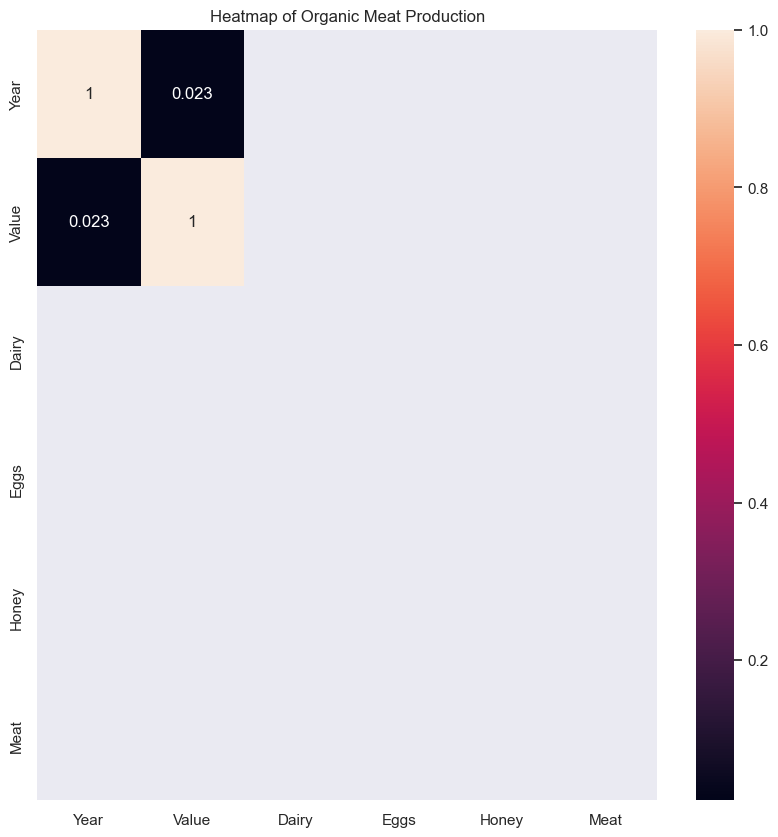

In [39]:
# Heatmap 

#REFERENCE: https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap

plt.figure(figsize=(10,10))
meat_corr = meat_df.corr()
sns.heatmap(meat_corr, annot=True);
plt.title("Heatmap of Organic Meat Production")

meat_corr

,Year,Value,Dairy,Eggs,Honey,Meat
Year,1.000000,0.035313,NaN,NaN,NaN,NaN
Value,0.035313,1.000000,NaN,NaN,NaN,NaN
Dairy,NaN,NaN,NaN,NaN,NaN,NaN
Eggs,NaN,NaN,NaN,NaN,NaN,NaN
Honey,NaN,NaN,NaN,NaN,NaN,NaN
Meat,NaN,NaN,NaN,NaN,NaN,NaN


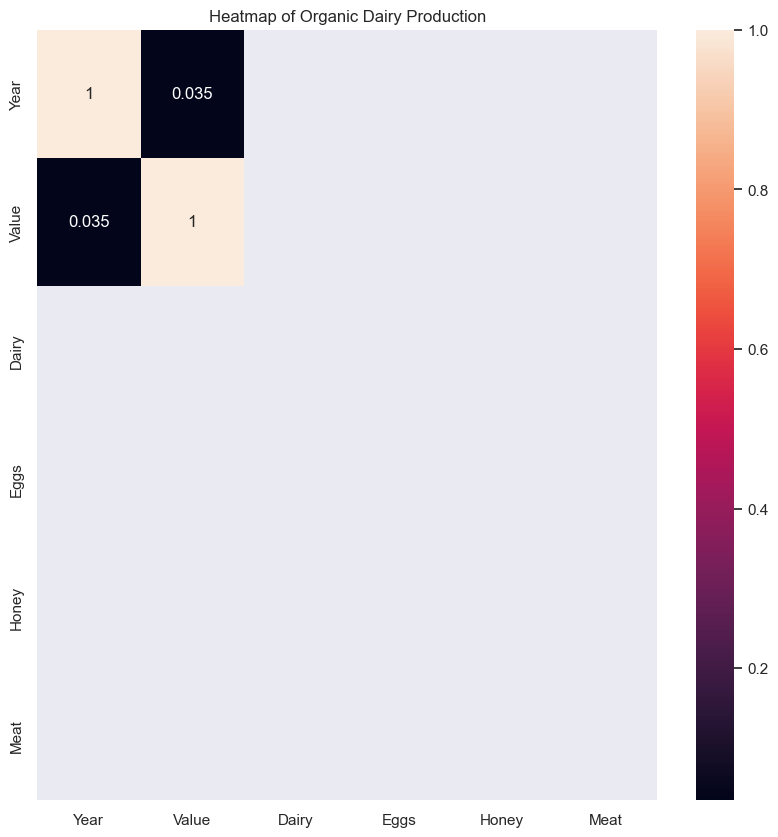

In [40]:
# Heatmap 

#REFERENCE: https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap

plt.figure(figsize=(10,10))
dairy_corr = dairy_df.corr()
sns.heatmap(dairy_corr, annot=True);
plt.title("Heatmap of Organic Dairy Production")
dairy_corr

,Year,Value,Dairy,Eggs,Honey,Meat
Year,1.000000,0.134703,NaN,NaN,NaN,NaN
Value,0.134703,1.000000,NaN,NaN,NaN,NaN
Dairy,NaN,NaN,NaN,NaN,NaN,NaN
Eggs,NaN,NaN,NaN,NaN,NaN,NaN
Honey,NaN,NaN,NaN,NaN,NaN,NaN
Meat,NaN,NaN,NaN,NaN,NaN,NaN


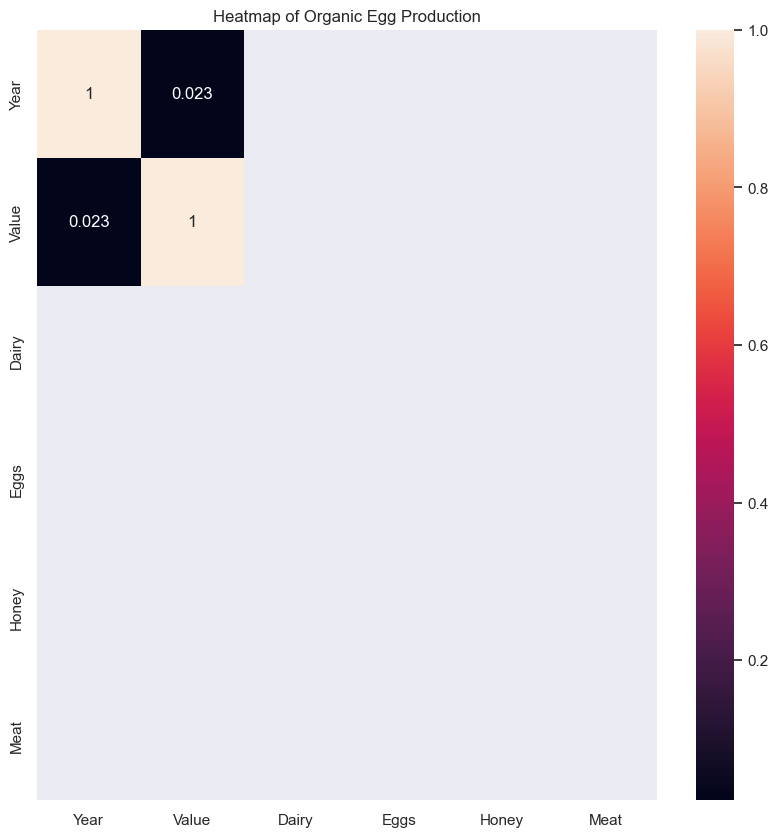

In [41]:
# Heatmap 

#REFERENCE: https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap

plt.figure(figsize=(10,10))
eggs_corr = eggs_df.corr()
sns.heatmap(meat_corr, annot=True);
plt.title("Heatmap of Organic Egg Production")

eggs_corr

,Year,Value,Dairy,Eggs,Honey,Meat
Year,1.000000,0.165836,NaN,NaN,NaN,NaN
Value,0.165836,1.000000,NaN,NaN,NaN,NaN
Dairy,NaN,NaN,NaN,NaN,NaN,NaN
Eggs,NaN,NaN,NaN,NaN,NaN,NaN
Honey,NaN,NaN,NaN,NaN,NaN,NaN
Meat,NaN,NaN,NaN,NaN,NaN,NaN


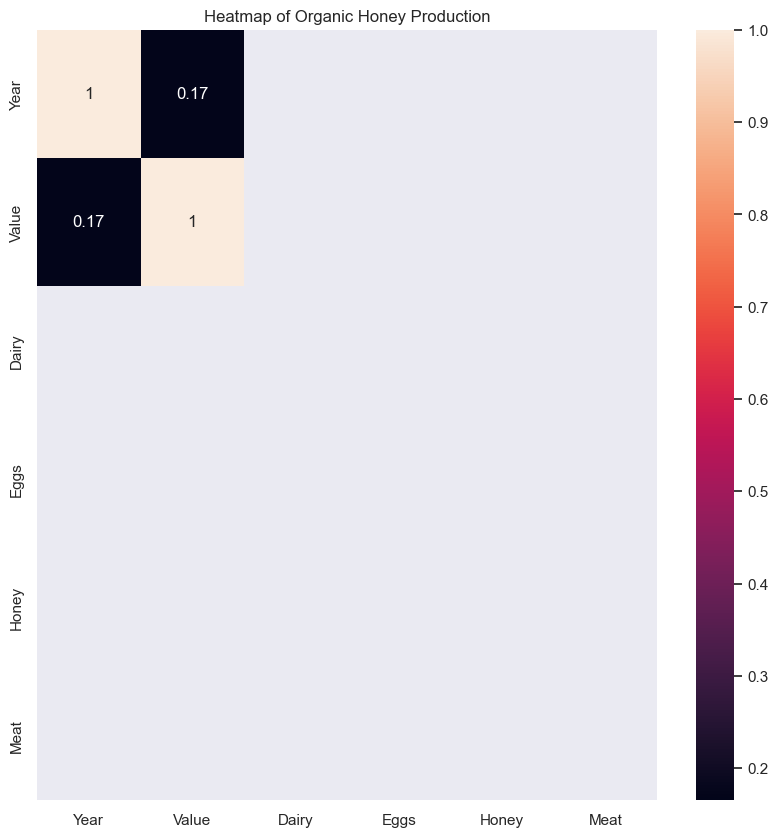

In [42]:
# Heatmap 

#REFERENCE: https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap

plt.figure(figsize=(10,10))
honey_corr = honey_df.corr()
sns.heatmap(honey_corr, annot=True);
plt.title("Heatmap of Organic Honey Production")

honey_corr

### Test for a Normal Distribution

##### Reference - https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93#:~:text=The%20Shapiro%20Wilk%20test%20is,for%20example%20the%20KS%20test.



TIME_PERIOD
OBS_VALUE
Dairy
Eggs
Honey
Meat
    

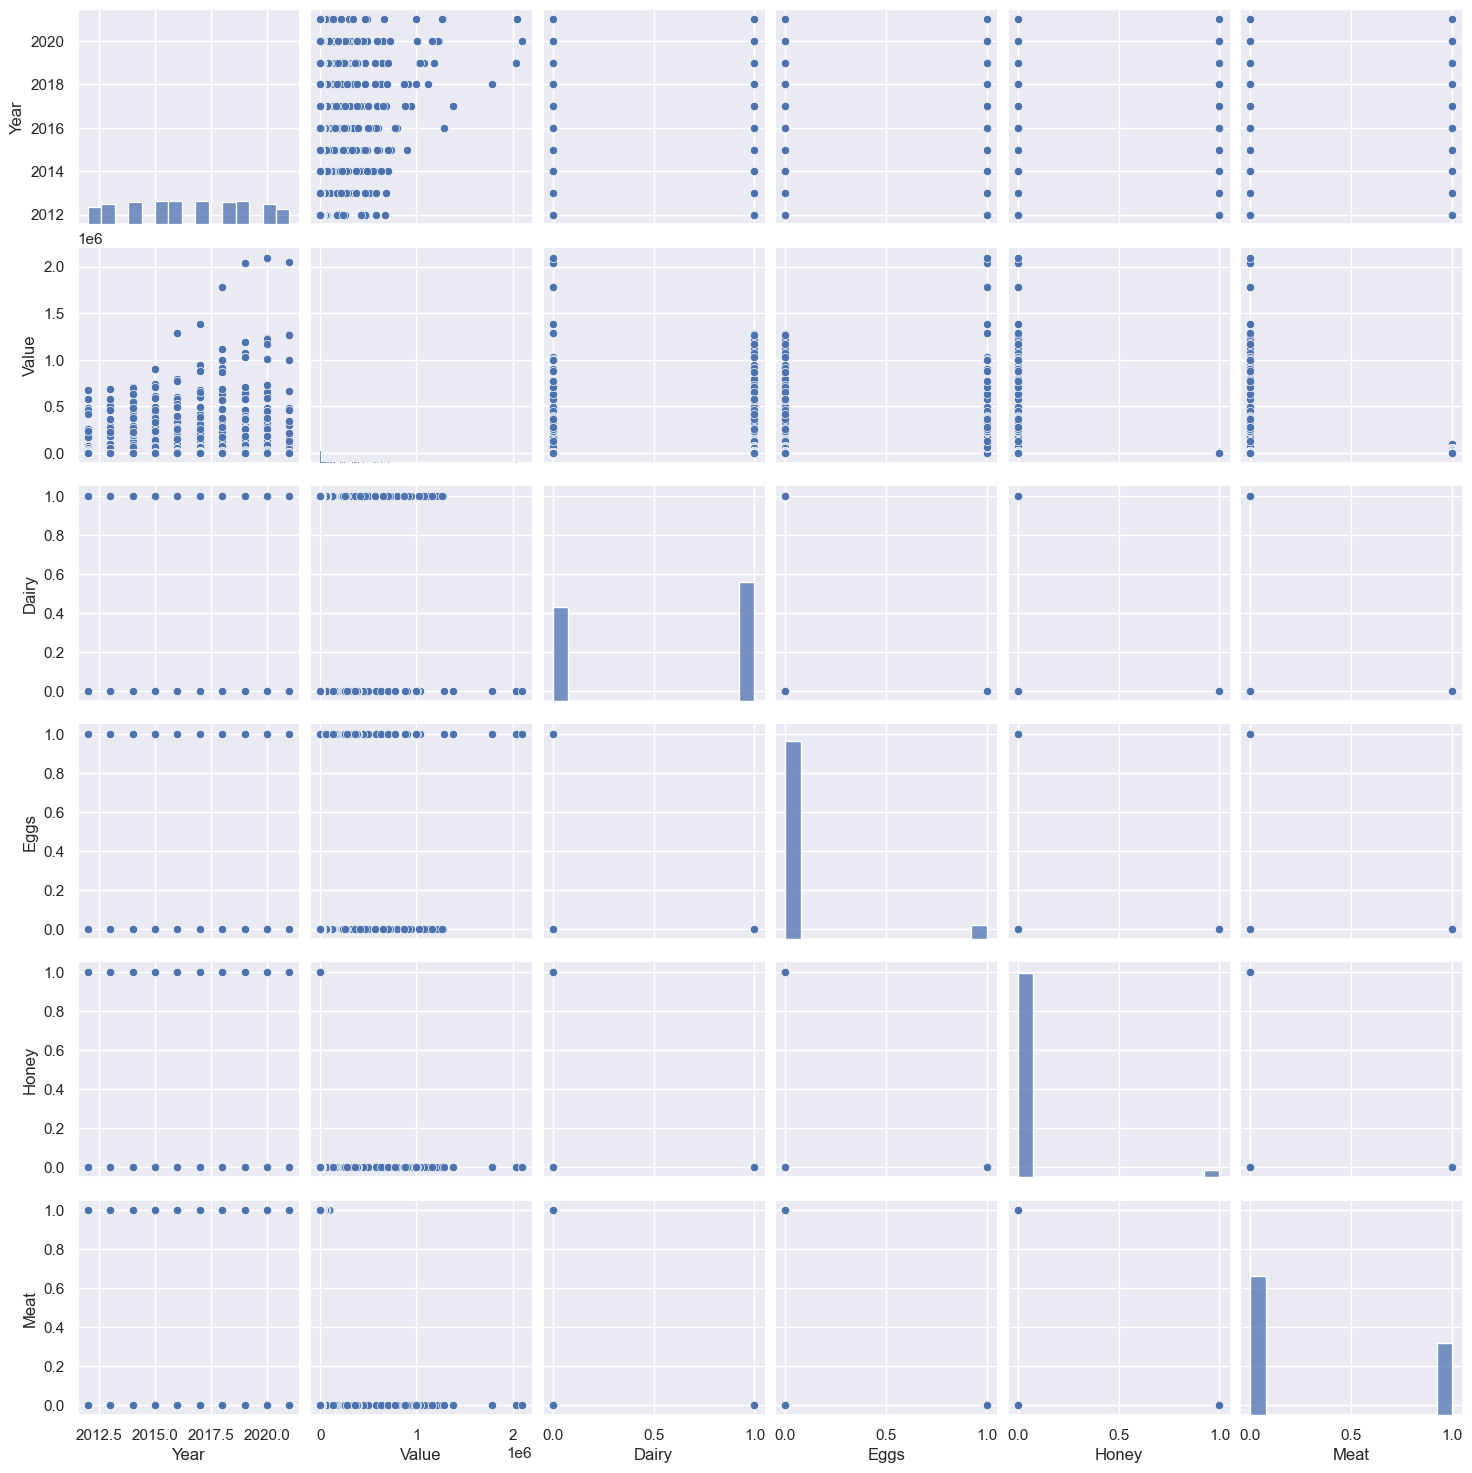

In [48]:
sns.pairplot(org_df)

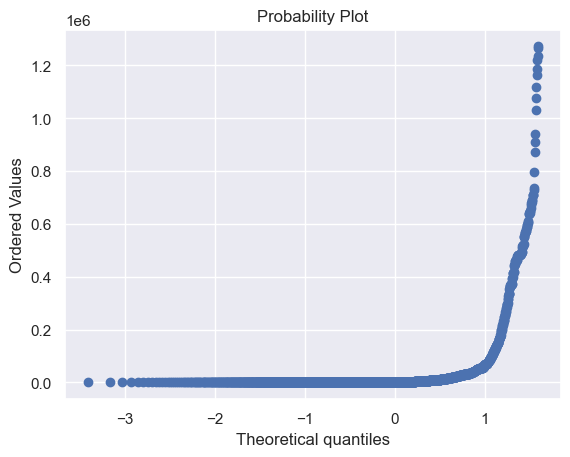

In [44]:
stats.probplot(dairy_df['Value'], dist="norm", plot=pylab)
pylab.show()

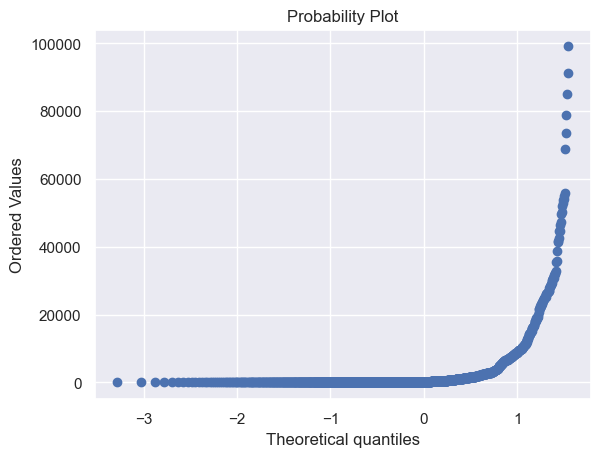

In [45]:
stats.probplot(meat_df['Value'], dist="norm", plot=pylab)
pylab.show()

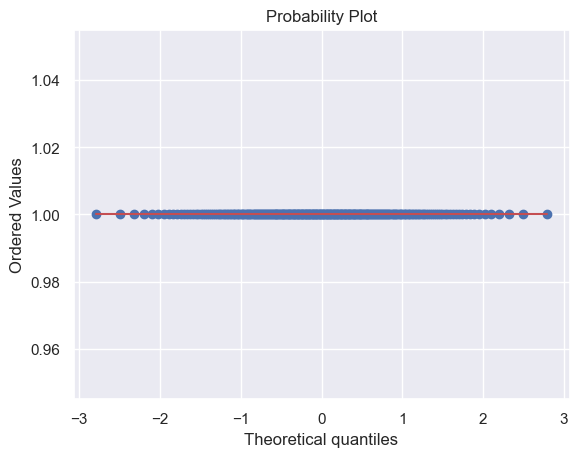

In [46]:
stats.probplot(eggs_df['Eggs'], dist="norm", plot=pylab)
pylab.show()

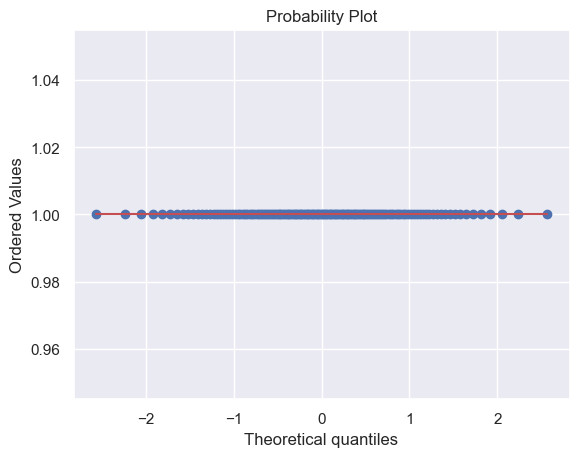

In [47]:
stats.probplot(honey_df['Honey'], dist="norm", plot=pylab)
pylab.show()